<p style="text-align:center">
    <a href="https://www.kaggle.com/datasets/joyshil0599/exploring-wealth-forbes-richest-people-dataset" target="_blank">
    <img src="forbes-logo.png" width="200" alt="Forbes"  />
    </a>
</p>

# Exploring Wealth: Forbes Richest People


## Notebook
Exploratory Analysis of Forbes Richest People

### Objectives

In this lab:

-   Acquire data from kaggle
-   Obtain insights from data with Pandas library

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_introduction">Introduction</a>
    <li><a href="#data_acquisition">Data Acquisition</a>
    <li><a href="#basic_insight">Basic Insight of Dataset</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns Using Visualization</a></li>
</ol>


</div>
<hr>


<h1 id="data_introduction">Introduction</h1>

<p>The Forbes Richest People Dataset is a collection of data related to the world's wealthiest individuals. It includes information about the billionaire's origins, current net worth, source of wealth, age, gender, education, and philanthropic activities. The dataset is regularly updated by Forbes and is widely used by researchers, analysts, and journalists to study trends in wealth accumulation, income inequality, and economic growth.<br>
    
<ul>
    <li>Data source: <a href="https://www.kaggle.com/datasets/joyshil0599/exploring-wealth-forbes-richest-people-dataset" target="_blank">https://www.kaggle.com/datasets/joyshil0599/exploring-wealth-forbes-richest-people-dataset</a></li>
    <li>Data type: csv</li>
</ul>

</p>


<h1 id="data_acquisition">Data Acquisition</h1>

In [ ]:
!pip install opendatasets


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/joyshil0599/exploring-wealth-forbes-richest-people-dataset/code')

Skipping, found downloaded files in ".\exploring-wealth-forbes-richest-people-dataset" (use force=True to force download)


In [3]:
csv_path = r"exploring-wealth-forbes-richest-people-dataset\forbes_richman.csv"
df = pd.read_csv(csv_path, encoding = "ISO-8859-1")

<h1 id="basic_insight">Basic Insights of Dataset</h1>

In [4]:
df.head()

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.0,Elon Musk,$219 B,50.0,United States,"Tesla, SpaceX",Automotive
1,2.0,Jeff Bezos,$171 B,58.0,United States,Amazon,Technology
2,3.0,Bernard Arnault & family,$158 B,73.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,$129 B,66.0,United States,Microsoft,Technology
4,5.0,Warren Buffett,$118 B,91.0,United States,Berkshire Hathaway,Finance & Investments


In [5]:
df.columns

Index(['Rank', 'Name', 'Net Worth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

In [6]:
df.dtypes

Rank         float64
Name          object
Net Worth     object
Age          float64
Country       object
Source        object
Industry      object
dtype: object

In [7]:
df.describe(include='all')

,Rank,Name,Net Worth,Age,Country,Source,Industry
count,2509.000000,2509,2509,2430.000000,2509,2509,2509
unique,NaN,2494,222,NaN,74,867,18
top,NaN,Polys Haji-Ioannou,$1.5 B,NaN,United States,real estate,Finance & Investments
freq,NaN,2,137,NaN,689,138,366
mean,1255.000000,NaN,NaN,64.296708,NaN,NaN,NaN
std,724.430236,NaN,NaN,13.357563,NaN,NaN,NaN
min,1.000000,NaN,NaN,19.000000,NaN,NaN,NaN
25%,628.000000,NaN,NaN,55.000000,NaN,NaN,NaN
50%,1255.000000,NaN,NaN,64.000000,NaN,NaN,NaN
75%,1882.000000,NaN,NaN,74.000000,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       2509 non-null   float64
 1   Name       2509 non-null   object 
 2   Net Worth  2509 non-null   object 
 3   Age        2430 non-null   float64
 4   Country    2509 non-null   object 
 5   Source     2509 non-null   object 
 6   Industry   2509 non-null   object 
dtypes: float64(2), object(5)
memory usage: 144.1+ KB


#### Dealing with Null Data

In [9]:
df.isnull().sum()

Rank         123
Name         123
Net Worth    123
Age          202
Country      123
Source       123
Industry     123
dtype: int64

In [10]:
df.isna().sum()

Rank         123
Name         123
Net Worth    123
Age          202
Country      123
Source       123
Industry     123
dtype: int64

In [11]:
df_clean_na = df.dropna(subset=["Net Worth","Source","Industry","Country"],axis=0)

In [12]:
df_clean_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       2509 non-null   float64
 1   Name       2509 non-null   object 
 2   Net Worth  2509 non-null   object 
 3   Age        2430 non-null   float64
 4   Country    2509 non-null   object 
 5   Source     2509 non-null   object 
 6   Industry   2509 non-null   object 
dtypes: float64(2), object(5)
memory usage: 156.8+ KB


In [13]:
df_clean_na.isnull().sum()

Rank          0
Name          0
Net Worth     0
Age          79
Country       0
Source        0
Industry      0
dtype: int64

In [14]:
df_no_null = df_clean_na.fillna(df_clean_na['Age'].mean())

In [15]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       2509 non-null   float64
 1   Name       2509 non-null   object 
 2   Net Worth  2509 non-null   object 
 3   Age        2509 non-null   float64
 4   Country    2509 non-null   object 
 5   Source     2509 non-null   object 
 6   Industry   2509 non-null   object 
dtypes: float64(2), object(5)
memory usage: 156.8+ KB


In [16]:
df_no_null.isna().sum()

Rank         0
Name         0
Net Worth    0
Age          0
Country      0
Source       0
Industry     0
dtype: int64

In [17]:
df_clean_na.to_csv(r"exploring-wealth-forbes-richest-people-dataset\forbes_richman_clean_null_rows.csv", index=False)

In [18]:
df_no_null.to_csv(r"exploring-wealth-forbes-richest-people-dataset\forbes_richman_age_nulls_adusted_with_mean.csv", index=False)

#### Handling Data Types

In [19]:
df_no_null['Net Worth'].head(30)

0      $219 B
1      $171 B
2      $158 B
3      $129 B
4      $118 B
5      $111 B
6      $107 B
7      $106 B
8     $91.4 B
9     $90.7 B
10      $90 B
11      $82 B
12    $74.8 B
13    $67.3 B
14    $66.2 B
15    $65.7 B
16    $65.3 B
17      $65 B
18      $65 B
19      $60 B
20      $60 B
21    $59.6 B
22    $55.1 B
23      $50 B
24    $49.2 B
25    $47.3 B
26    $44.8 B
27    $43.6 B
28    $41.4 B
29    $40.4 B
Name: Net Worth, dtype: object

In [20]:
df_no_null['Net Worth'] = df_no_null['Net Worth'].str.replace('$', '').str.replace(' B', '').astype("float")
# apply(lambda x: float(x.strip('M'))*1000000)

C:\Users\Sumit\AppData\Local\Temp\ipykernel_16032\2021606806.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_no_null['Net Worth'] = df_no_null['Net Worth'].str.replace('$', '').str.replace(' B', '').astype("float")


In [21]:
df_no_null.dtypes

Rank         float64
Name          object
Net Worth    float64
Age          float64
Country       object
Source        object
Industry      object
dtype: object

In [22]:
df_no_null.rename(columns={"Net Worth":"Net Worth in Billion $"}, inplace=True)

In [23]:
df_no_null.describe(include='all')

,Rank,Name,Net Worth in Billion $,Age,Country,Source,Industry
count,2509.000000,2509,2509.000000,2509.000000,2509,2509,2509
unique,NaN,2494,NaN,NaN,74,867,18
top,NaN,Polys Haji-Ioannou,NaN,NaN,United States,real estate,Finance & Investments
freq,NaN,2,NaN,NaN,689,138,366
mean,1255.000000,NaN,4.759486,64.296708,NaN,NaN,NaN
std,724.430236,NaN,10.672003,13.145503,NaN,NaN,NaN
min,1.000000,NaN,1.000000,19.000000,NaN,NaN,NaN
25%,628.000000,NaN,1.500000,55.000000,NaN,NaN,NaN
50%,1255.000000,NaN,2.300000,64.296708,NaN,NaN,NaN
75%,1882.000000,NaN,4.300000,74.000000,NaN,NaN,NaN


In [24]:
age_bins = np.linspace(10,100,10)
age_bins

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [25]:
age_group_names = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

In [26]:
df_nn = df_no_null
df_nn['age-bins']=pd.cut(df_nn['Age'],age_bins,labels=age_group_names, include_lowest=False)
df_nn.head(10)

,Rank,Name,Net Worth in Billion $,Age,Country,Source,Industry,age-bins
0,1.0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive,40-50
1,2.0,Jeff Bezos,171.0,58.0,United States,Amazon,Technology,50-60
2,3.0,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail,70-80
3,4.0,Bill Gates,129.0,66.0,United States,Microsoft,Technology,60-70
4,5.0,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments,90-100
5,6.0,Larry Page,111.0,49.0,United States,Google,Technology,40-50
6,7.0,Sergey Brin,107.0,48.0,United States,Google,Technology,40-50
7,8.0,Larry Ellison,106.0,77.0,United States,software,Technology,70-80
8,9.0,Steve Ballmer,91.4,66.0,United States,Microsoft,Technology,60-70
9,10.0,Mukesh Ambani,90.7,64.0,India,diversified,Diversified,60-70


In [27]:
df_nn[['age-bins']].value_counts()


age-bins
60-70       685
50-60       673
70-80       519
40-50       244
80-90       232
30-40        84
90-100       58
20-30        13
10-20         1
dtype: int64

Text(0.5, 1.0, 'age bins')

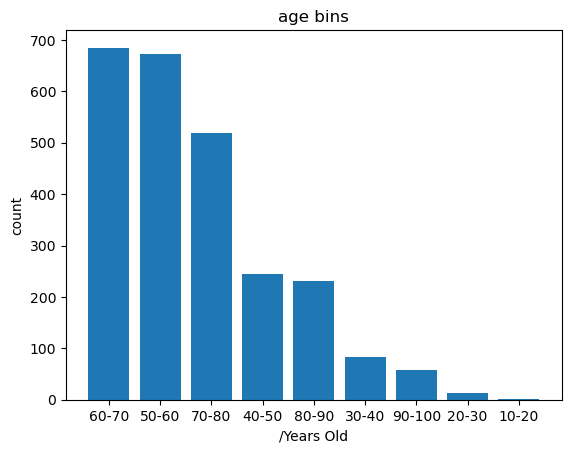

In [28]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(['60-70','50-60','70-80','40-50','80-90','30-40','90-100','20-30','10-20'], df_nn['age-bins'].value_counts())

plt.pyplot.xlabel("/Years Old")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")


<h2 id="pattern_visualization">Analyzing Individual Feature Patterns Using Visualization</h2>

In [29]:
df_nn.corr()

C:\Users\Sumit\AppData\Local\Temp\ipykernel_16032\4163990719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nn.corr()


,Rank,Net Worth in Billion $,Age
Rank,1.000000,-0.431983,-0.127764
Net Worth in Billion $,-0.431983,1.000000,0.034804
Age,-0.127764,0.034804,1.000000


<Axes: xlabel='Age', ylabel='Net Worth in Billion $'>

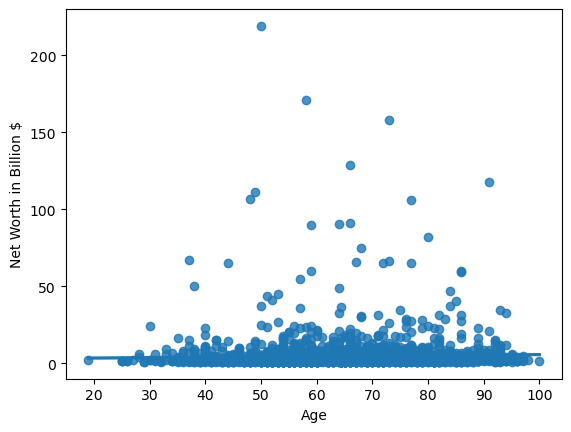

In [30]:
import seaborn as sns
sns.regplot(x="Age",y="Net Worth in Billion $",data=df_nn)

<Axes: xlabel='age-bins', ylabel='Net Worth in Billion $'>

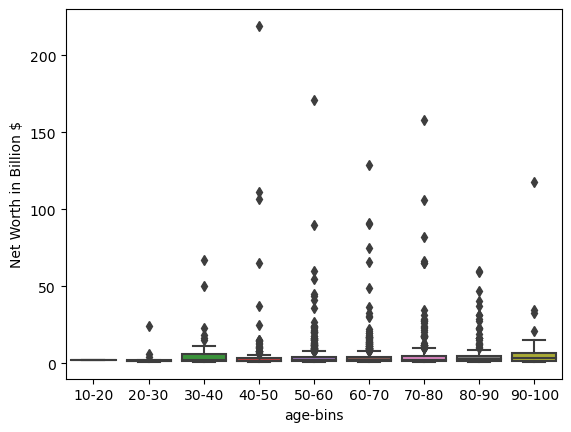

In [31]:
sns.boxplot(x="age-bins",y="Net Worth in Billion $",data=df_nn)

In [32]:
df_nn.Country.unique()

array(['United States', 'France', 'India', 'China', 'Canada', 'Spain',
       'Hong Kong', 'Germany', 'Italy', 'Mexico', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Netherlands', 'United Arab Emirates', 'Ireland', 'Nigeria',
       'Denmark', 'Thailand', 'Cyprus', 'Taiwan', 'Malaysia', 'Israel',
       'Monaco', 'Colombia', 'New Zealand', 'South Korea', 'Belgium',
       'South Africa', 'Philippines', 'Egypt', 'Greece', 'Norway',
       'Poland', 'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan',
       'Georgia', 'Turkey', 'Portugal', 'Finland', 'Ukraine', 'Argentina',
       'Belize', 'Venezuela', 'Vietnam', 'Lebanon', 'Romania', 'Guernsey',
       'Oman', 'Iceland', 'Liechtenstein', 'Qatar', 'Bulgaria', 'Morocco',
       'Macau', 'Barbados', 'Slovakia', 'St. Kitts and Nevis', 'Tanzania',
       'Uruguay', 'Nepal', 'Hungary', 'Estonia'], dtype=object)

In [33]:
df_group1 = df_nn[['Country','Age','Net Worth in Billion $']]

In [34]:
df_g1 = df_group1.groupby(['Country'],as_index=False).mean()
df_g1

,Country,Age,Net Worth in Billion $
0,Algeria,78.000000,5.100000
1,Argentina,81.049451,2.333333
2,Australia,64.216203,4.655814
3,Austria,68.545455,5.609091
4,Barbados,34.000000,1.700000
...,...,...,...
69,United Kingdom,68.078118,3.728261
70,United States,66.661079,6.562990
71,Uruguay,51.000000,1.500000
72,Venezuela,62.000000,3.500000


In [37]:
df_g2 = df_group1.groupby(['Age','Country'],as_index=False).mean()
df_g2

,Age,Country,Net Worth in Billion $
0,19.0,Germany,2.4
1,25.0,Brazil,1.5
2,25.0,China,1.5
3,25.0,Norway,1.3
4,26.0,Brazil,1.5
...,...,...,...
940,97.0,Japan,4.6
941,97.0,Peru,1.5
942,97.0,United States,2.0
943,98.0,United States,2.5


In [39]:
df_g3 = df_group1.groupby(['Age'],as_index=False).mean()
df_g3

C:\Users\Sumit\AppData\Local\Temp\ipykernel_16032\3368026274.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g3 = df_group1.groupby(['Age'],as_index=False).mean()


,Age,Net Worth in Billion $
0,19.0,2.400000
1,25.0,1.433333
2,26.0,1.400000
3,27.0,2.000000
4,28.0,5.200000
...,...,...
72,95.0,3.542857
73,96.0,2.080000
74,97.0,2.700000
75,98.0,2.500000


In [60]:
gp_pivot = df_g2.pivot(index="Country",columns="Age")
gp_pivot.replace(np.nan, int(0))

Net Worth in Billion $                                      \
Age                             19.0  25.0  26.0  27.0  28.0  29.0  30.0    
Country                                                                     
Algeria                           0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Argentina                         0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Australia                         0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Austria                           0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Barbados                          0.0   0.0   0.0   0.0   0.0  0.00   0.0   
...                               ...   ...   ...   ...   ...   ...   ...   
United Kingdom                    0.0   0.0   0.0   0.0   0.0  0.00   0.0   
United States                     0.0   0.0   0.0   2.0   5.9  1.15  13.1   
Uruguay                           0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Venezuela                         0.0   0.0   0.0   0.0   0.0  0.00   0.0   
Vietnam                           0.0   0.0   0.0   0.0   0.0  0.00   0.0   

                                  ...                                   \
Age            31.0  32.0  33.0   ... 90.0       91.0      92.0  93.0    
Country                           ...                                    
Algeria         0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
Argentina       0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
Australia       0.00   0.0   0.0  ...   0.0   4.450000  0.000000   0.0   
Austria         0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
Barbados        0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
...              ...   ...   ...  ...   ...        ...       ...   ...   
United Kingdom  0.00   0.0   0.0  ...   0.0   3.000000  0.000000   0.0   
United States   4.15   1.9   4.2  ...   3.2  49.133333  8.833333   4.2   
Uruguay         0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
Venezuela       0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   
Vietnam         0.00   0.0   0.0  ...   0.0   0.000000  0.000000   0.0   

                                                            
Age                94.0      95.0  96.0  97.0  98.0  100.0  
Country                                                     
Algeria         0.000000  0.000000   0.0   0.0   0.0   0.0  
Argentina       0.000000  2.400000   0.0   0.0   0.0   0.0  
Australia       0.000000  0.000000   0.0   0.0   0.0   0.0  
Austria         0.000000  0.000000   0.0   0.0   0.0   0.0  
Barbados        0.000000  0.000000   0.0   0.0   0.0   0.0  
...                  ...       ...   ...   ...   ...   ...  
United Kingdom  0.000000  0.000000   1.3   0.0   0.0   0.0  
United States   1.566667  3.633333   3.0   2.0   2.5   1.8  
Uruguay         0.000000  0.000000   0.0   0.0   0.0   0.0  
Venezuela       0.000000  0.000000   0.0   0.0   0.0   0.0  
Vietnam         0.000000  0.000000   0.0   0.0   0.0   0.0  

[74 rows x 77 columns]

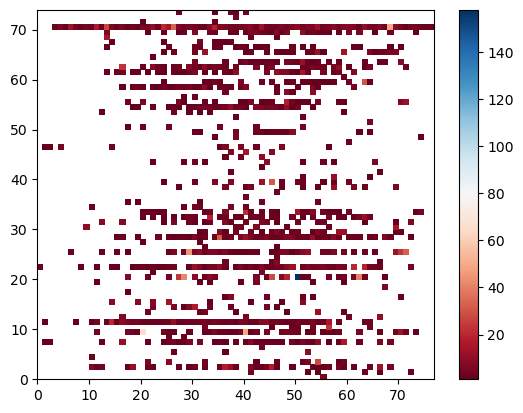

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.pcolor(gp_pivot, cmap="RdBu")
plt.colorbar()
plt.show()